In [3]:
# some Useful bits to disable the ecessive warnings that the colour science module produces
import warnings
warnings.filterwarnings('ignore')
import colour

spd = colour.ILLUMINANTS_RELATIVE_SPDS.get('F2')
colour.colour_rendering_index(spd)

64.14954789201002

Light is electromagnetic raditation from within a certain part of the electromagnetic spectrum (roughly 400nm to 700nm). This can be seen in the plot below.

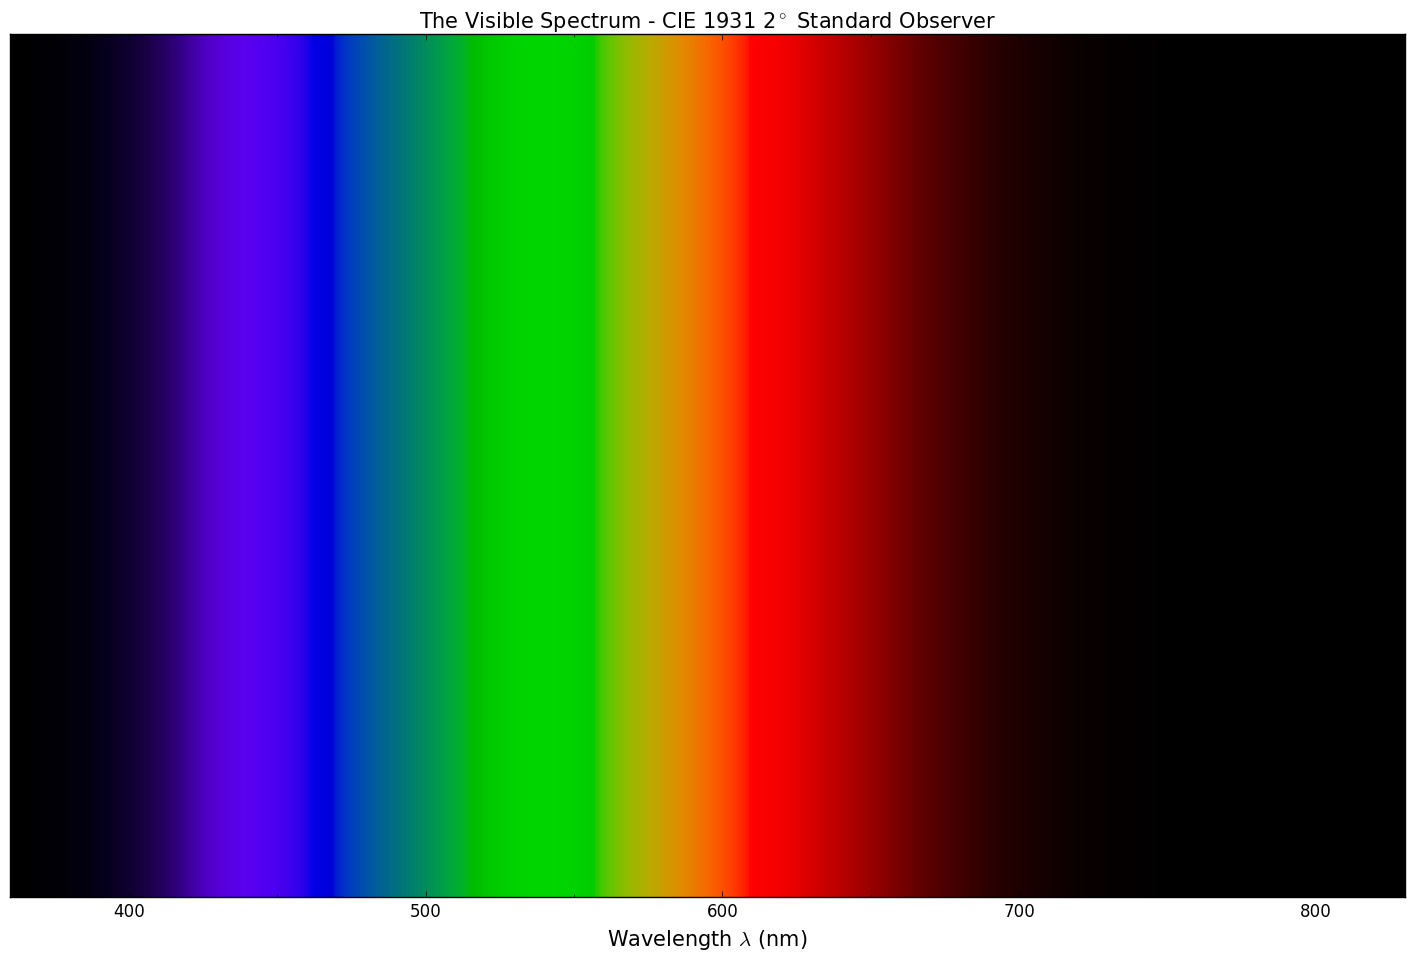

In [4]:
%matplotlib inline
from colour.plotting import visible_spectrum_plot

visible_spectrum_plot()


In [51]:
#from colour.plotting import colour_checker_plot
#colour_checker_plot(colour_checker='ColorChecker 2005', text_display=False)


A given light source will emit light of a variety of wavelenghs, the relative intensity of these  will determine the colour of the light. A graph of the Spectral Power Distribution shows the relative intensity of all the wavelenghts within the visible spectrum. 

The human vision system has receptors that are sensitive to three wavelenghts of light.

| Cone type | Name | Range | Peak wavelength |
| --------- | ---- | ----- | --------------- |
| S         | β    | 400–500 nm | 420–440 nm |
| M         | γ    | 450–630 nm | 534–555 nm |
| L         | ρ    | 500–700 nm | 564–580 nm |


The specific sensitivity will vary from person to person, however for the purposes of colour science we use a defined 'standard observer'.

The colour that a person sees when they look at an object is a combination of the spectrum present in the light source illuminating the object, the reflectivity of that object for the wavelenght of light in the spectrum, and the sensiitivity of the observer.
If we use the standard observer then a standard measurement for a colour can be computed.

SpectralPowerDistribution('Sample', (380.0, 780.0, 5.0))


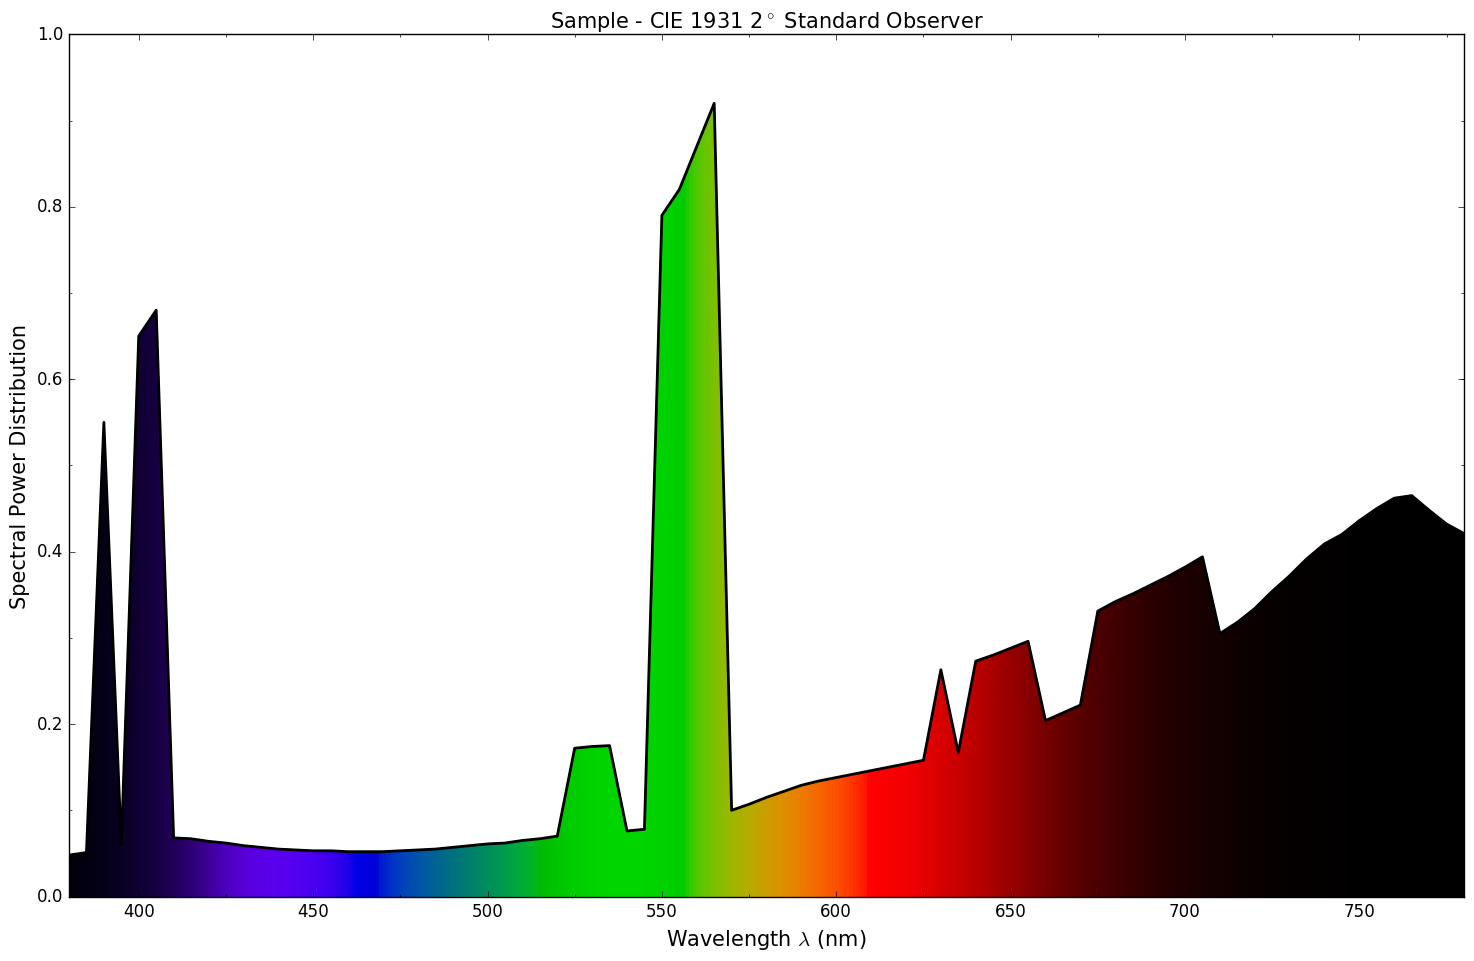

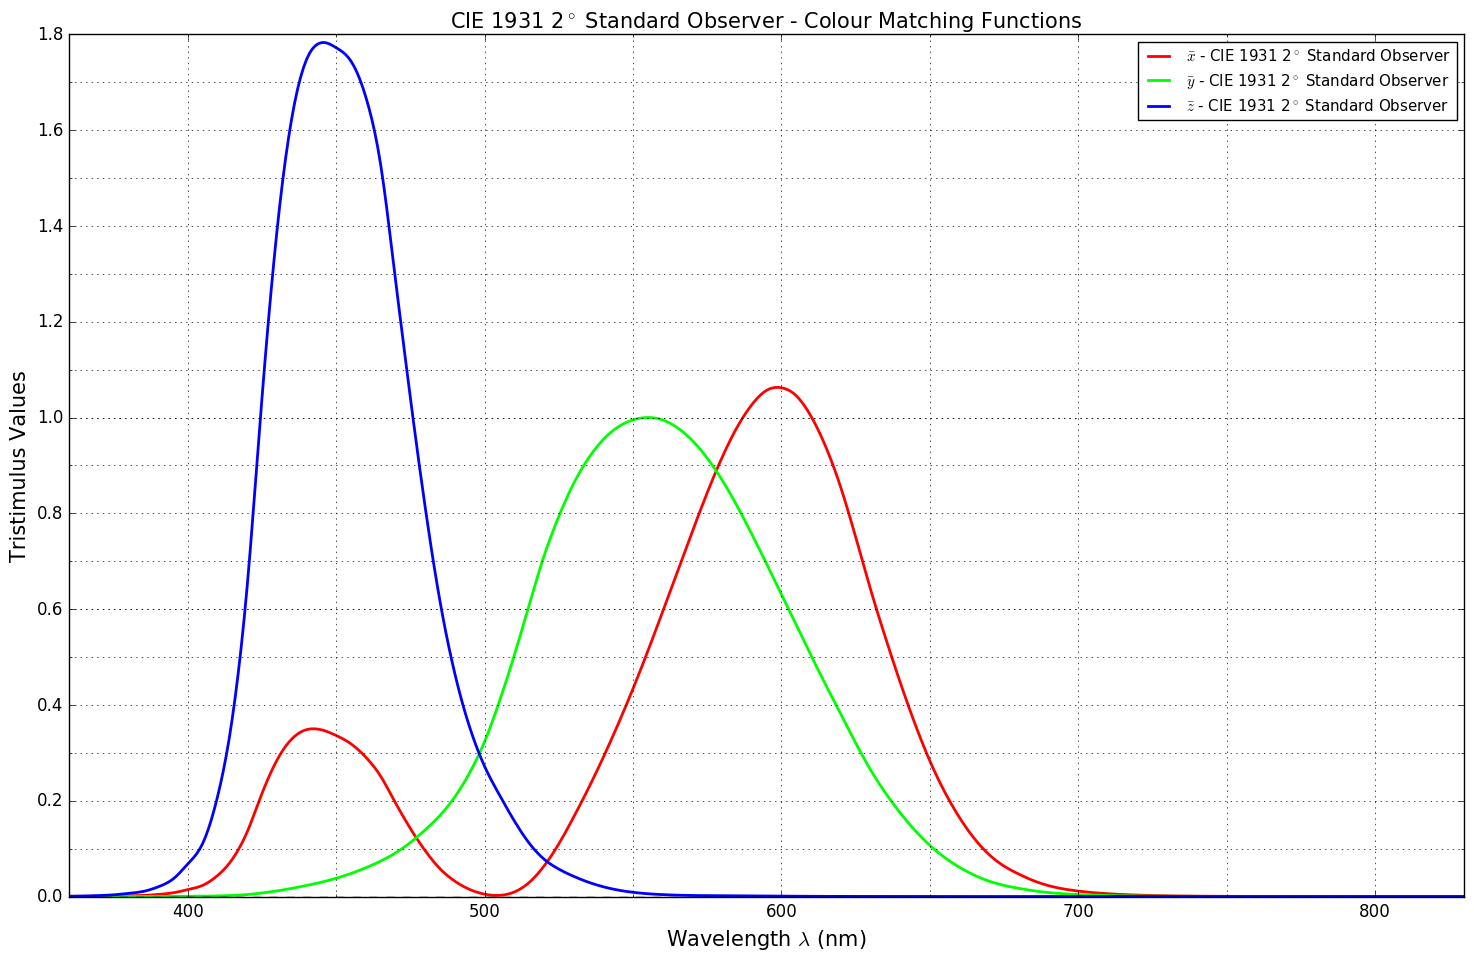

[ 20.30626027  25.8225685    6.65612156]


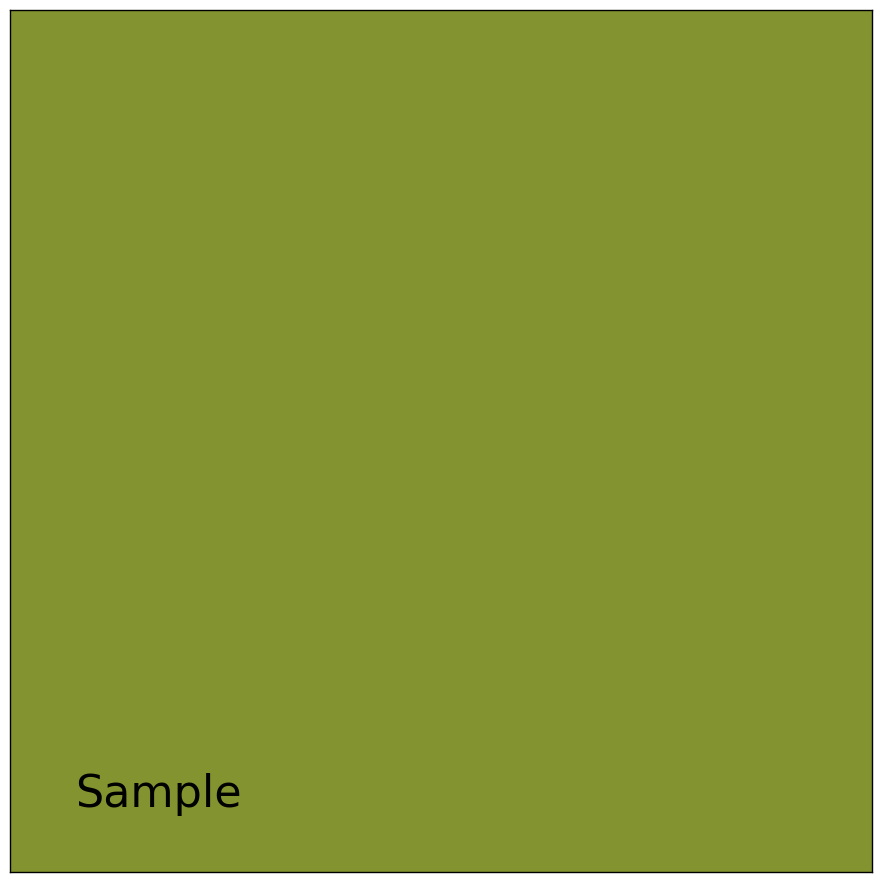

In [5]:
import pylab
from pprint import pprint
from colour.plotting import *
import colour.colorimetry as colorimetry
import colour.colorimetry.dataset as dataset

# Defining a sample spectral power distribution data.
sample_spd_data = {
    380: 0.048,
    385: 0.051,
    390: 0.55,
    395: 0.060,
    400: 0.65,
    405: 0.68,
    410: 0.068,
    415: 0.067,
    420: 0.064,
    425: 0.062,
    430: 0.059,
    435: 0.057,
    440: 0.055,
    445: 0.054,
    450: 0.053,
    455: 0.053,
    460: 0.052,
    465: 0.052,
    470: 0.052,
    475: 0.053,
    480: 0.054,
    485: 0.055,
    490: 0.057,
    495: 0.059,
    500: 0.061,
    505: 0.062,
    510: 0.065,
    515: 0.067,
    520: 0.070,
    525: 0.172,
    530: 0.174,
    535: 0.175,
    540: 0.076,
    545: 0.078,
    550: 0.79,
    555: 0.82,
    560: 0.87,
    565: 0.92,
    570: 0.100,
    575: 0.107,
    580: 0.115,
    585: 0.122,
    590: 0.129,
    595: 0.134,
    600: 0.138,
    605: 0.142,
    610: 0.146,
    615: 0.150,
    620: 0.154,
    625: 0.158,
    630: 0.263,
    635: 0.167,
    640: 0.273,
    645: 0.280,
    650: 0.288,
    655: 0.296,
    660: 0.204,
    665: 0.213,
    670: 0.222,
    675: 0.331,
    680: 0.342,
    685: 0.351,
    690: 0.361,
    695: 0.371,
    700: 0.382,
    705: 0.394,
    710: 0.305,
    715: 0.318,
    720: 0.334,
    725: 0.354,
    730: 0.372,
    735: 0.392,
    740: 0.409,
    745: 0.420,
    750: 0.436,
    755: 0.450,
    760: 0.462,
    765: 0.465,
    770: 0.448,
    775: 0.432,
    780: 0.421}

spd = colour.SpectralPowerDistribution('Sample', sample_spd_data)
print(spd)
single_spd_plot(spd)

cmfs = colour.STANDARD_OBSERVERS_CMFS['CIE 1931 2 Degree Standard Observer']
single_cmfs_plot()
illuminant = colour.ILLUMINANTS_RELATIVE_SPDS['D65']




# Calculating the sample spectral power distribution *CIE XYZ* tristimulus values.
XYZ = colour.spectral_to_XYZ(spd, cmfs, illuminant)
print(XYZ)
RGB = colour.XYZ_to_sRGB(XYZ / 100)

single_colour_plot(ColourParameter('Sample', RGB), text_size=32)



[ 0.38470189  0.48921241]


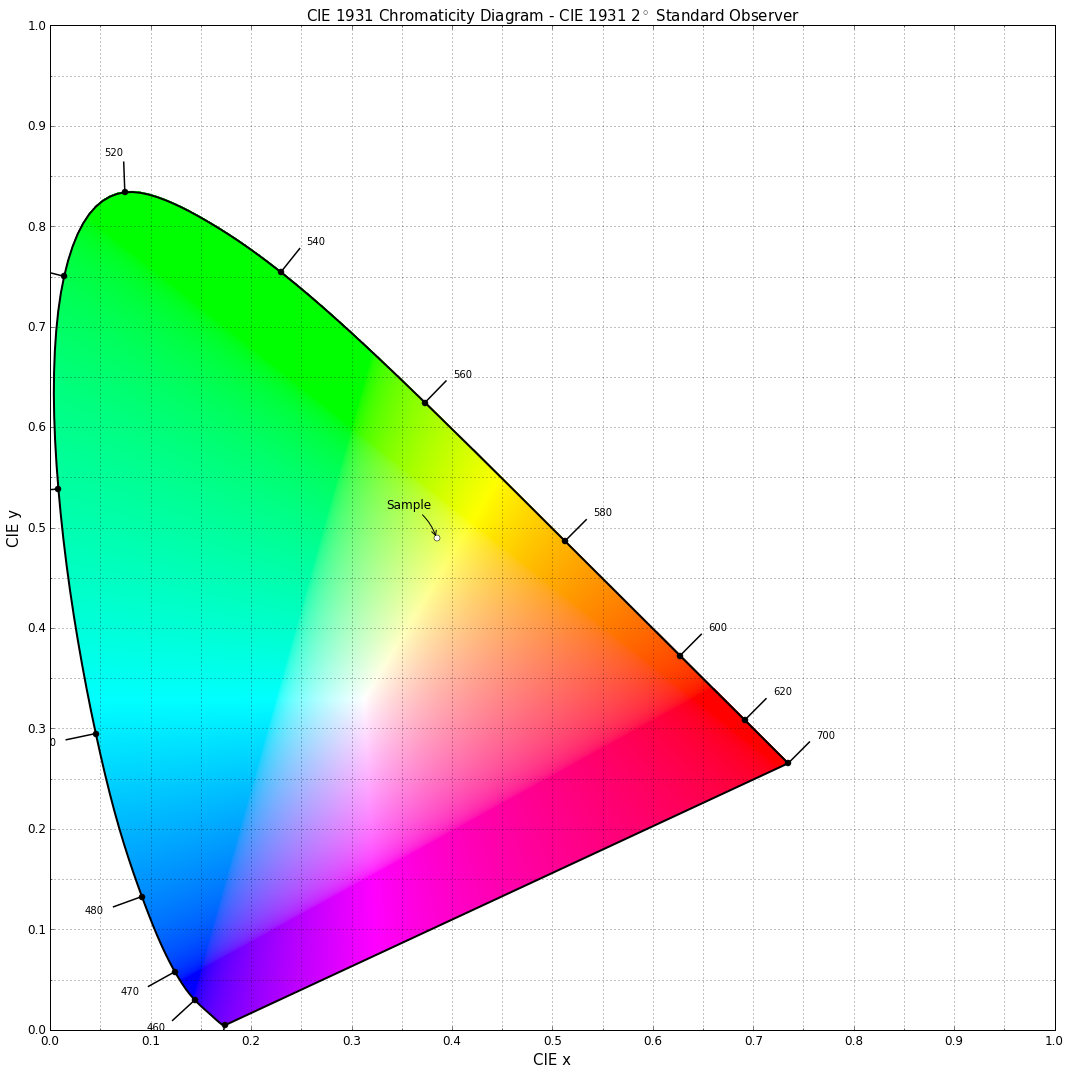

True

In [50]:
# Plotting the *CIE 1931 Chromaticity Diagram*.
# The argument *standalone=False* is passed so that the plot doesn't get displayed
# and can be used as a basis for other plots.

CIE_1931_chromaticity_diagram_plot(standalone=False)

xy =  colour.XYZ_to_xy(XYZ)
print(xy)

# Plotting the *xy* chromaticity coordinates.
x, y = xy
pylab.plot(x, y, 'o-', color='white')

# Annotating the plot.
pylab.annotate(spd.name.title(),
               xy=xy,
               xytext=(-50, 30),
               textcoords='offset points',
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=-0.2'))

# Displaying the plot.
display(standalone=True)